In [1]:
# Importing Required Packages

import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn as sk
import sklearn
import IPython
from IPython import display 
from joblib import load


import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,LabelBinarizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pandas as pd

#Visualization Modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)

In [2]:
# Reading the CSV file into a pandas dataframe
import pandas as pd

data = pd.read_excel(r"D:/Clinton files.py/My details/Fin_project/Industrial copper modeling/Copper_Set.xlsx")


In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data['material_ref']

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

# Converting the Data into required data formats and handling missing values

In [5]:
df = data.copy()

# Check the columns of dataframe
data.columns


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=181673, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [9]:
# Check unique counts

print(len(df['item_date'].unique())) 
print(len(df['customer'].unique())) 
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) 
print(len(df['delivery date'].unique())) 
print(df.shape)

253
1170
16564
33
29
(181673, 14)


In [10]:
# Check missing value counts

miss_val_count = df.isnull().sum()

print(miss_val_count)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [11]:
# Total missing values
print(f'Total missing value : {df.isnull().sum().sum()}')

Total missing value : 77980


In [12]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [13]:
#converting the data types
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [14]:
# Replacing Material_ref column has large number of null values converting them into unknown values

df['material_ref'].fillna('unknown', inplace=True)

# Deleting the other null values, because they have less count and wont impact the models

df = df.dropna()

In [15]:
miss_val_count = df.isnull().sum()

print(miss_val_count)

print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [16]:
df_c = df.copy()

PLOTTING

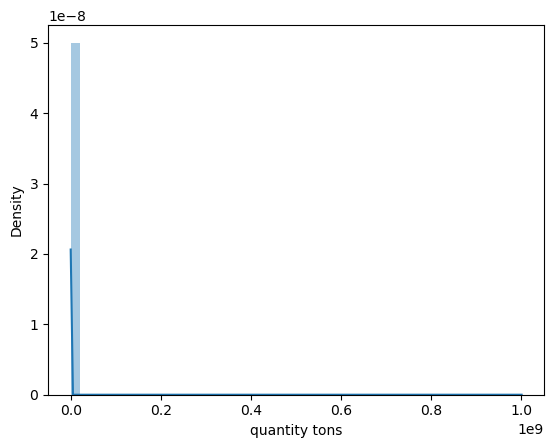

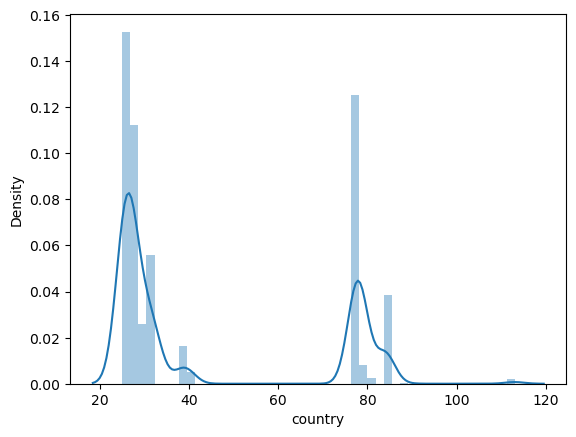

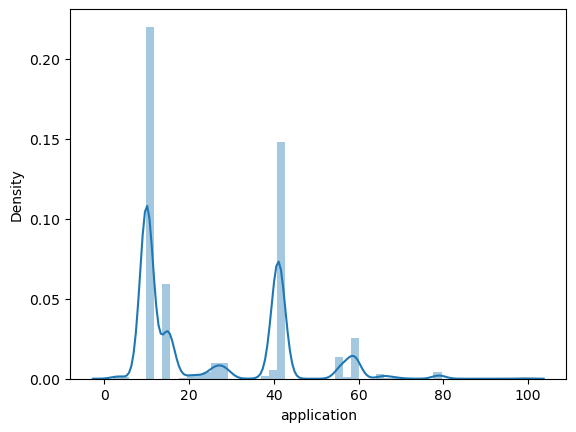

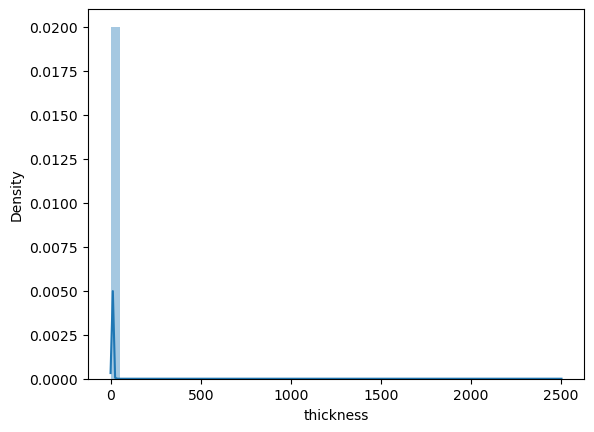

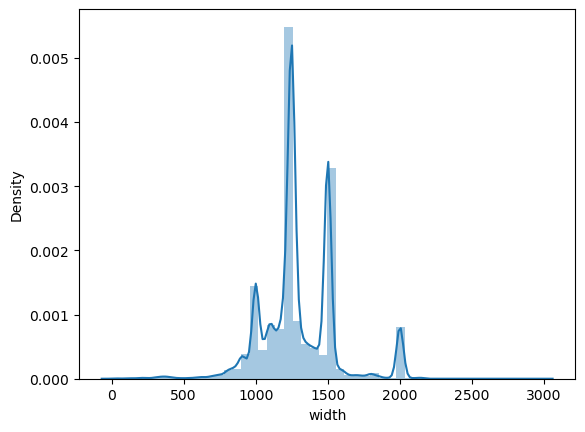

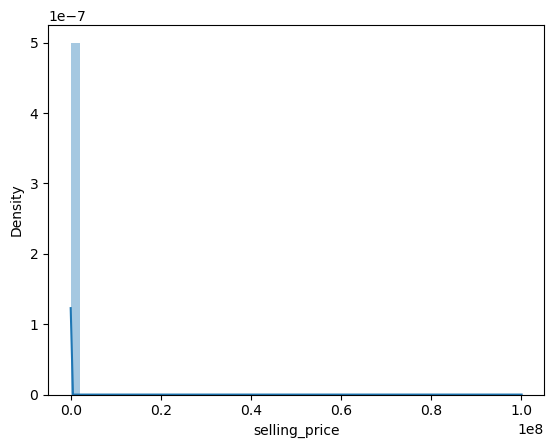

In [17]:
df_c['quantity tons']   # skewed
df_c['country']
df_c['application']
df_c['thickness']       # skewed
df_c['width']           
df_c['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_c['quantity tons'])
plt.show()

sns.distplot(df_c['country'])
plt.show()

sns.distplot(df_c['application'])
plt.show()

sns.distplot(df_c['thickness'])
plt.show()

sns.distplot(df_c['width'])
plt.show()

sns.distplot(df_c['selling_price'])
plt.show()

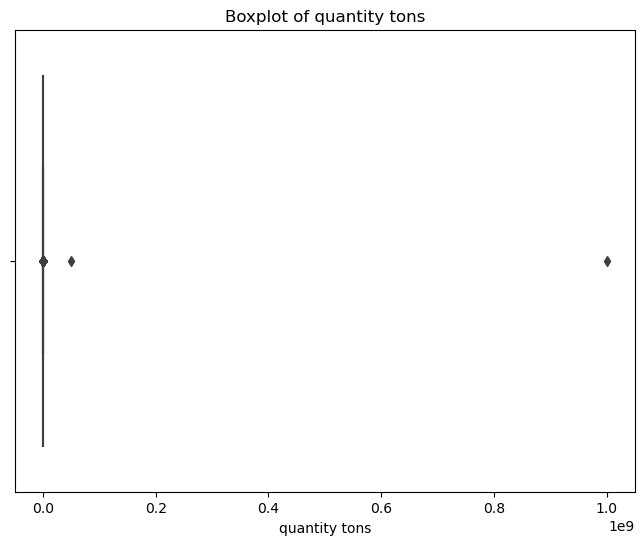

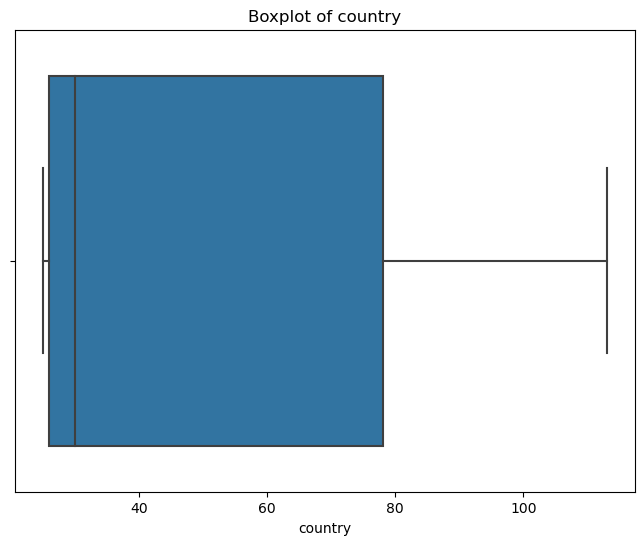

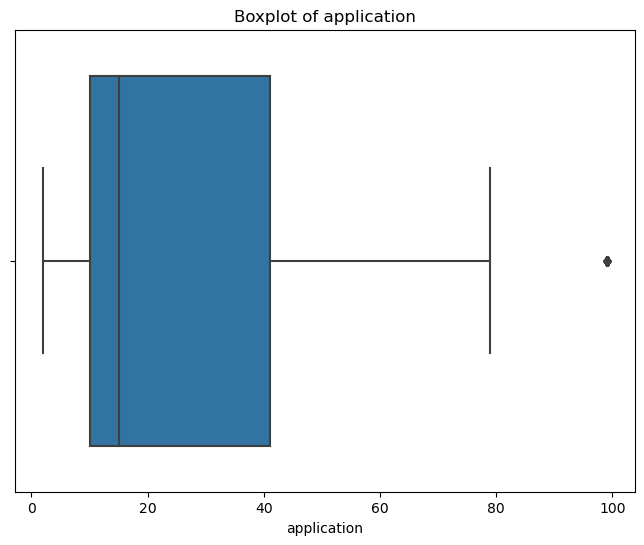

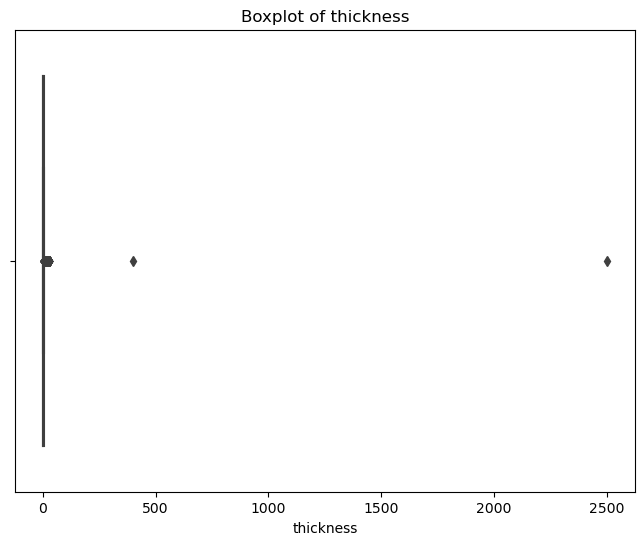

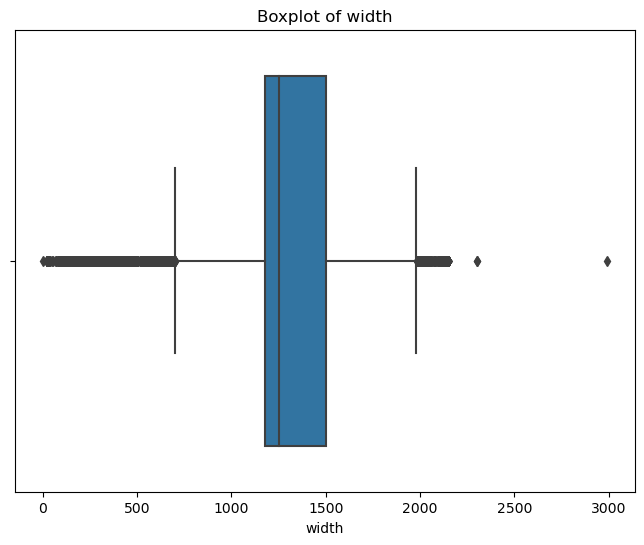

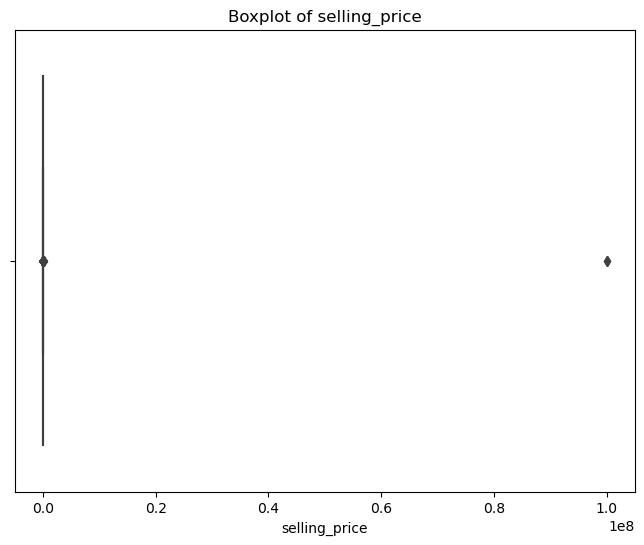

In [18]:
# List of columns(continuous variables) for finding skewness with boxplot
col = ['quantity tons', 'country', 'application', 'thickness', 'width', 'selling_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

The above Two plots (distplot and boxplot) reveals the skewness and outliers of the data

* To handle skewness we are going to use the Log Transformation
* Log transformation is often used to reduce right skewness (positive skewness) in data.
* It is particularly effective when dealing with data where the values are strictly positive.
* Converting the values less that 0 to NAN values so that we can use Log Transformation 
* Only doing it for the (selling_price and quantity_tons) colums because out of six columns only these two columns had values less that 0 as displayed above

In [19]:
# Checking for NAN values
c1 = df_c['selling_price'] <= 0
print(c1.sum())
df_c.loc[c1, 'selling_price'] = np.nan

c2 = df_c['quantity tons'] <= 0
print(c2.sum())
df_c.loc[c2, 'quantity tons'] = np.nan

c3 = df_c['thickness'] <= 0
print(c3.sum())

7
4
0


In [20]:
df_c.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [21]:
# Now dropping those NaN values so that we can use Log Transformation to handle skewness

df_c.dropna(inplace=True)
len(df_c)

181620

In [22]:
df_c.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

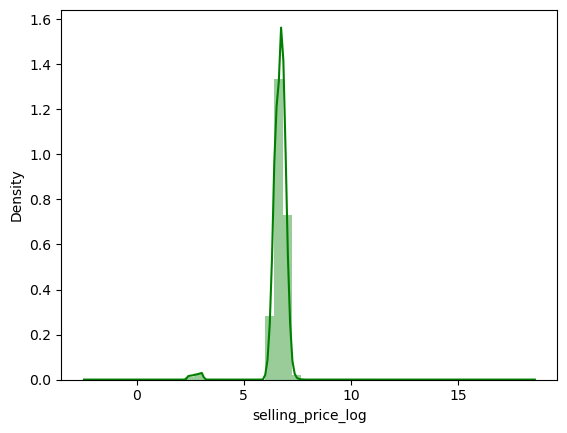

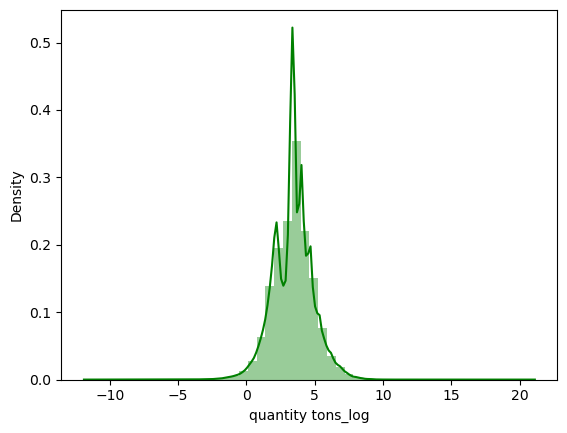

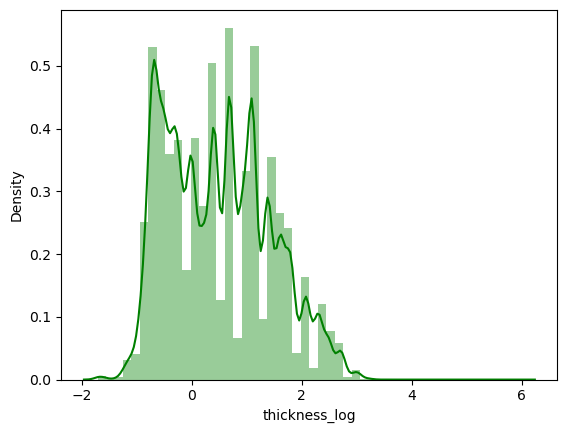

In [23]:
# Applying log transformation to the below columns to handle skewness

df_c['selling_price_log'] = np.log(df_c['selling_price'])
sns.distplot(df_c['selling_price_log'], color='green')
plt.show()

df_c['quantity tons_log'] = np.log(df_c['quantity tons'])
sns.distplot(df_c['quantity tons_log'], color='green')
plt.show()

df_c['thickness_log'] = np.log(df_c['thickness'])
sns.distplot(df_c['thickness_log'], color='green')
plt.show()

In [24]:
df_c.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [25]:
x=df_c[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()


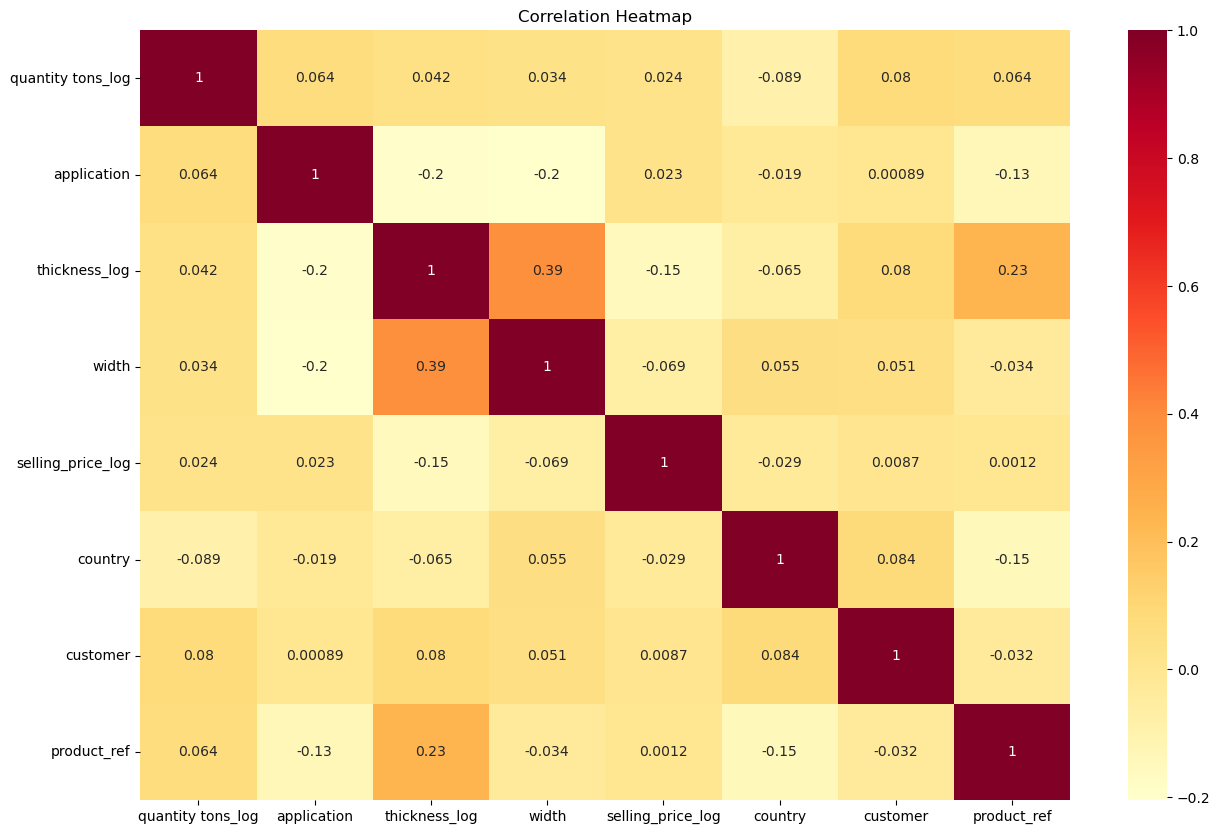

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(x, annot=True, cmap='YlOrRd', ax=ax)
plt.title("Correlation Heatmap")
plt.show()


# Splitting the data

In [27]:
X=df_c[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_c['selling_price_log']

Encoding the data 

In [28]:
# One-Hot Encoding, encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)


# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
test = pd.DataFrame(X)


In [30]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [31]:
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.02296696287487659
R-squared: 0.9287118896386344


In [32]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [706.961582]


In [33]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [34]:
df_s = df_c[df_c['status'].isin(['Won', 'Lost'])]
len(df_s)

150427

# Decision Tree Classifier

In [35]:
Y = df_s['status']
X= df_s[['item type','application','width','country','customer','product_ref']]

Encoding the data

In [36]:
Y = df_s['status']
X= df_s[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
test1 = pd.DataFrame(X)

test1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.429113,0.261194,-0.861366,0.202226,0.759513,-0.710194,-0.725078,1.667403,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
1,2.268662,1.106327,0.896005,-0.781578,-0.330024,-0.832701,-0.283558,1.664479,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
2,1.791682,-0.907334,0.159043,-1.580869,-1.299337,-0.628522,-0.747282,-0.661135,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,-1.253854,17.24721
3,1.343685,-0.179063,1.916413,0.352286,0.071978,-0.546850,1.104877,1.664479,-0.013399,-0.055564,-0.186035,1.366631,-0.002578,-1.253854,-0.05798
4,2.284291,-1.365125,-0.861366,0.946445,2.638026,-0.710194,-0.201920,-0.661118,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150422,0.900106,-1.189194,0.896005,-0.585823,-0.217313,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150423,0.871591,-1.265686,0.896005,-0.585823,-0.292454,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150424,1.362866,-1.279746,0.896005,-0.597066,0.759513,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150425,-1.338445,-1.073686,0.896005,-0.909718,-0.179743,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798


In [38]:
test2 = pd.DataFrame(y)
test2

,0
0,1
1,1
2,1
3,1
4,1
...,...
150422,1
150423,1
150424,1
150425,1


In [39]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# decision tree classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9120188792129229
Confusion Matrix:
[[ 5693  1309]
 [ 1338 21746]]


Confusion Matrix:
[[ 5693  1309]
 [ 1338 21746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



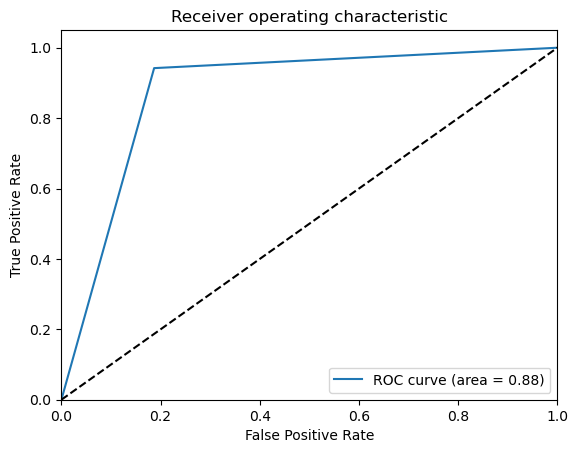

In [41]:
# Evalution Metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Predicting the status for a new sample

new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_hote = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_hote), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [43]:
# Saving the model

import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [ ]:
import pickle

# Corrected file path with raw string literal
file_path = r"D:\Clinton files.py\My details\Fin_project\Industrial copper modeling\model.pkl"
print("Attempting to load model from:", file_path)

try:
    with open(file_path, "rb") as file:
        loaded_model = pickle.load(file)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)